# **Emotion Classification Project**
## 1. Introduction
In this project, we classify emotions from text data using logistic regression and natural language processing techniques.

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
from datasets import load_dataset

dataset = load_dataset("dair-ai/emotion")
df = pd.DataFrame(dataset['train'])

df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


<ipython-input-35-46f04b495ec7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='label', palette='viridis', legend=False)


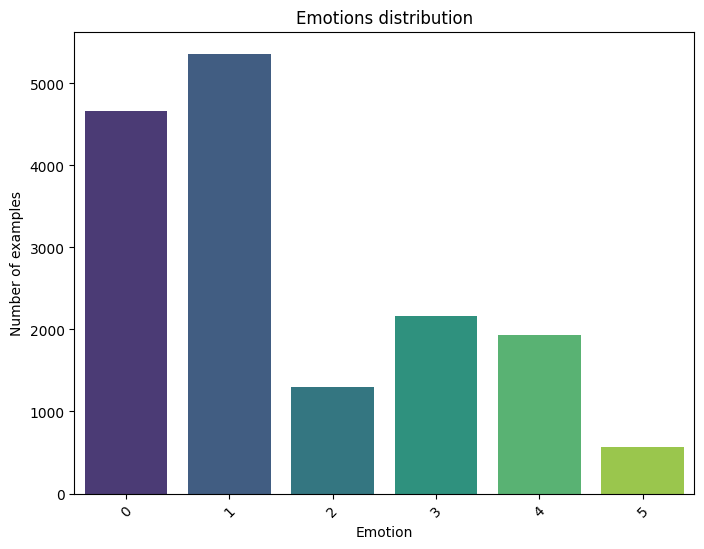

Emotions: ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


In [35]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='label', palette='viridis', legend=False)
plt.title('Emotions distribution')
plt.xlabel('Emotion')
plt.ylabel('Number of examples')
plt.xticks(rotation=45)
plt.show()

labels = dataset['train'].features['label'].names
print("Emotions:", labels)


In [36]:
train_data = dataset['train']
test_data = dataset['test']
validation_data = dataset['validation']

train_data["text"][:2]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake']

## 2. Preprocessing
We apply tokenization, stop-word removal, and lemmatization to clean the text data.

In [37]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word not in stop_words]
    return tokens

def lemmatize_text(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized_tokens)

train_data_cleaned = [lemmatize_text(preprocess_text(text)) for text in train_data["text"]]
test_data_cleaned = [lemmatize_text(preprocess_text(text)) for text in test_data["text"]]
validation_data.cleaned = [lemmatize_text(preprocess_text(text)) for text in validation_data["text"]]

In [38]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data_cleaned).toarray()
X_test = vectorizer.transform(test_data_cleaned).toarray()

y_train = train_data['label']
y_test = test_data['label']


## 3. Model Training
We use Logistic Regression to classify the emotions in the text data.

In [39]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Emotions:", labels)

              precision    recall  f1-score   support

           0       0.90      0.93      0.91       581
           1       0.86      0.95      0.90       695
           2       0.82      0.64      0.72       159
           3       0.88      0.84      0.86       275
           4       0.87      0.79      0.83       224
           5       0.94      0.52      0.67        66

    accuracy                           0.87      2000
   macro avg       0.88      0.78      0.82      2000
weighted avg       0.87      0.87      0.87      2000

Emotions: ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']


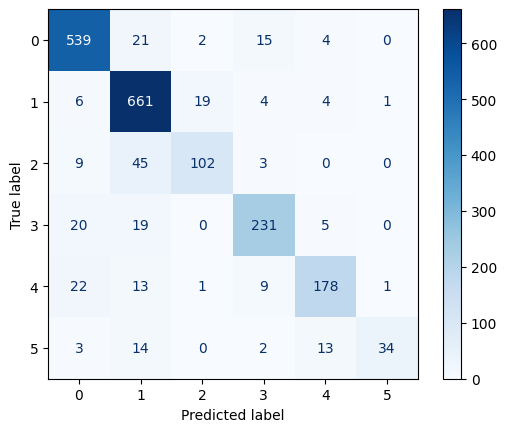

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix, display_labels=model.classes_).plot(cmap='Blues')
plt.show()
